In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("final.csv")

# EDA continues

In [4]:
dfnew=df.copy()
dfnew.keys()

Index(['Unnamed: 0', 'order_number', 'order_date', 'channel', 'order_quantity',
       'unit_price', 'revenue', 'total_unit_cost', 'customer_name',
       'product_name', 'county', 'state', 'state_code', 'region', 'latitude',
       'longitude', 'budget_2024'],
      dtype='object')

**seasonality view**

In [5]:
dfnew["order_date"]=pd.to_datetime(dfnew["order_date"])         #ensure it is in datetime format
# 1. Create boolean mask for rows to keep (remove 2025 data as only jan and feb is available)
mask = ~(
    (dfnew["order_date"].dt.year == 2025) &
    (dfnew["order_date"].dt.month.isin([1, 2]))
)

# 2. Apply mask and make a copy- column not specified hence selects all columns
dfnew = dfnew.loc[mask].copy()


In [6]:

dfnew["month_name"]=dfnew["order_date"].dt.month_name()         #extract month nanes
dfnew["month_num"]= dfnew["order_date"].dt.month               #extract month number
monthly_sales=dfnew.groupby(['month_num','month_name'])["revenue"].sum().reset_index().sort_values('month_num')


In [ ]:
plt.plot(monthly_sales["month_name"],monthly_sales["revenue"], marker='o',label="monthly sales")
plt.grid(True)
plt.xlabel("revenue")
plt.ylabel("month")
plt.title("seasonality view")
plt.xticks(rotation=45)
plt.show()

top 10 product by revenue

In [ ]:
top10=dfnew.groupby("product_name")["revenue"].sum().reset_index().sort_values("revenue", ascending=False)
# plt.bar(top10["revenue"],top10["product_name"], color="black")
top10=top10.head(10)
top10
plt.figure(figsize=(10,6))
bars = plt.bar(top10["product_name"], top10["revenue"], color="skyblue")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x-position: center of bar
        height + 0.05*max(top10["revenue"]),  # y-position: slightly above bar
        f'{height:.0f}',  # format value
        ha='center', va='bottom'
    )

plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.title("Top 10 Products by Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

sales by channel

In [ ]:
saleschannel= dfnew.groupby("channel")["revenue"].sum().reset_index()
plt.Figure(figsize=(5,5))
plt.pie(saleschannel["revenue"], autopct="%1.1f%%", colors=sns.color_palette("colorblind"))
plt.legend(saleschannel["channel"], loc="lower center", ncol=3)
plt.title("sales by channel")
plt.show()

average order distribution

In [ ]:
aod=dfnew.groupby("order_number")["revenue"].sum().reset_index()
plt.hist(aod["revenue"], edgecolor="black", color="lightgreen", bins=50)
plt.show()

unit price distribution per product

In [7]:
dfnew.keys()

Index(['Unnamed: 0', 'order_number', 'order_date', 'channel', 'order_quantity',
       'unit_price', 'revenue', 'total_unit_cost', 'customer_name',
       'product_name', 'county', 'state', 'state_code', 'region', 'latitude',
       'longitude', 'budget_2024', 'month_name', 'month_num'],
      dtype='object')

In [ ]:
unitp = dfnew.groupby("product_name")["unit_price"].sum().reset_index().sort_values("unit_price")
plt.figure(figsize=(12,6))
plt.bar(unitp["product_name"],unitp["unit_price"], color=sns.color_palette("colorblind6") )
plt.ylabel("unitprice ranges")
plt.xlabel("no of products")
plt.xticks(rotation=90)
plt.show()

top 10 states by revenue and order count

In [ ]:
dfnew.keys()

In [ ]:
state = dfnew.groupby("state").agg({
    "revenue": "sum",
    "order_number": "count"
}).reset_index()

state.rename(columns={"order_number":"order_count"}, inplace=True)
stater=state.sort_values("revenue",ascending=False).head(10)
stateo=state.sort_values("order_count",ascending=False).head(10)

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.suptitle("top 10 state")
plt.bar(stater["state"], stater["revenue"], color=sns.color_palette("colorblind6"))
plt.xticks(rotation=90)
plt.title("by revenue")
plt.subplot(1,2,2)
plt.bar(stateo["state"], stateo["order_count"], color=sns.color_palette("colorblind6"))
plt.xticks(rotation=90)
plt.title("by order")


average profit margin by channels

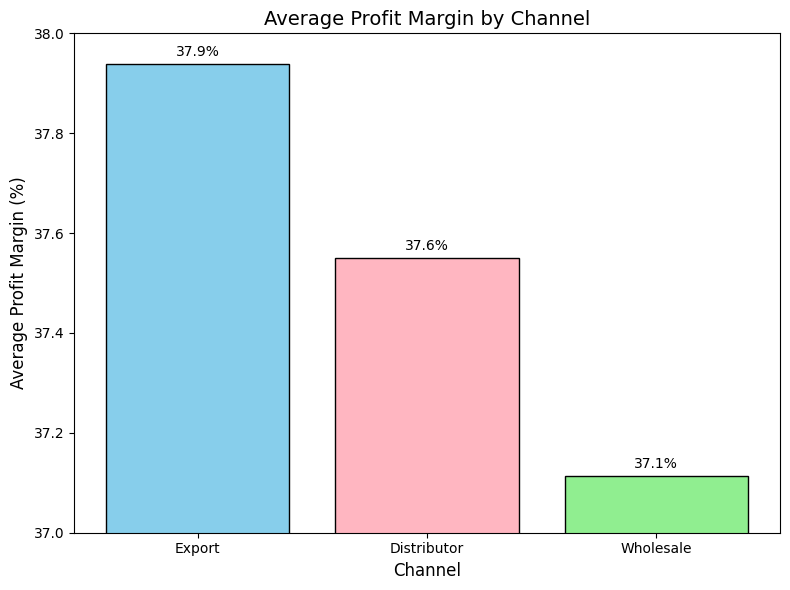

In [8]:
# Calculate profit and profit margin
dfnew["profit"] = dfnew["revenue"] - (dfnew["order_quantity"] * dfnew["total_unit_cost"])
dfnew["profit_margin_pct"] = (dfnew["profit"] / dfnew["revenue"]) * 100

# Group by channel and calculate average profit margin
avg_margin = (
    dfnew.groupby("channel")["profit_margin_pct"]
    .mean()
    .reset_index()
    .sort_values("profit_margin_pct", ascending=False)
)

# Plot bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(avg_margin["channel"], avg_margin["profit_margin_pct"], color=["skyblue","lightpink","lightgreen"], edgecolor="black")
plt.ylim(37, 38)
# # Add value labels
for bar in bars:
    height = bar.get_height()
    # print(height)
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f"{height:.1f}%",
        ha="center", va="bottom"
    )

plt.title("Average Profit Margin by Channel", fontsize=14)
plt.xlabel("Channel", fontsize=12)
plt.ylabel("Average Profit Margin (%)", fontsize=12)
plt.tight_layout()
plt.show()


top and bottom 10 cutomers by revenue

In [ ]:
cust=dfnew.groupby("customer_name")["revenue"].sum().reset_index().sort_values("revenue", ascending=False)
plt.subplot(1,2,1)
plt.Figure(figsize=(10,10))
plt.bar(cust["customer_name"].head(10), cust["revenue"].head(10), color=sns.color_palette("colorblind6"))
plt.xticks(rotation=45, ha="right")
plt.suptitle("top 10 customer")
plt.subplot(1,2,2)
plt.Figure(figsize=(10,10))
plt.bar(cust["customer_name"].tail(10), cust["revenue"].tail(10), color=sns.color_palette("colorblind6"))
plt.xticks(rotation=45, ha="right")
plt.suptitle("bottom 10 customer")
plt.show()

In [ ]:
cust=dfnew.groupby("customer_name")["revenue"].sum().reset_index().sort_values("revenue", ascending=False)
cust1=cust.head(10)
cust2=cust.tail(10)

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.barh(cust1["customer_name"],cust1["revenue"], color=sns.color_palette("colorblind6") )
plt.title("top 10 customer by revenue")
plt.xticks( rotation=75, ha="right")

plt.subplot(1,2,2)
plt.barh(cust2["customer_name"],cust2["revenue"], color=sns.color_palette("colorblind6") )
plt.title("bottom 10 customer by revenue")
plt.xticks( rotation=75, ha="right")

plt.tight_layout()
plt.show()

customer segmentation: revenue vs profit margin

In [ ]:
# dfnew = dfnew.drop(dfnew.columns[-1], axis=1)
# dfnew = dfnew.iloc[:, :-1]
# dfnew



In [ ]:
customer_metrics = (
    dfnew.groupby("customer_name")
    .agg({"revenue": "sum", "profit_margin_pct": "mean"})
    .reset_index()
)

# 2. Identify top 5 customers by revenue
top5 = customer_metrics.nlargest(5, "revenue")

# 3. Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    customer_metrics["revenue"],
    customer_metrics["profit_margin_pct"],
    alpha=0.6,
    color="blue",
    label="Customers"
)


# Highlight top 5 customers correctly
plt.scatter(
    top5["revenue"],
    top5["profit_margin_pct"],
    color="red",
    edgecolor="black",
    s=100,
    label="Top 5 by Revenue"
)

# Labels and formatting
plt.title("Customer Segmentation: Revenue vs Profit Margin", fontsize=16)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Average Profit Margin (%)", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


corelation heatmap

In [ ]:
# Assuming your dataframe is df
numeric_cols = ['order_quantity', 'unit_price', 'revenue', 'total_unit_cost',
                'budget_2024', 'profit', 'profit_margin_pct']

# Calculate correlation matrix
corr_matrix = dfnew[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [ ]:
dfnew= dfnew.to_excel("final_sales.xlsx")

AttributeError: 'NoneType' object has no attribute 'keys'